# Arbeidskrav 5 - SOK-1005 - V25
#### *SOK-1005, V25*
### Kandidatnr. 18
___

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# laster inn pandas for å laste opp datasettene
import pandas as pd

# leser inn alle datasettene
# de rå datasettene er bare separert med ; og ikke egne kolonner, fikser opp i dette ved å lage seperasjoner
# Levanger data
A = pd.read_csv("aldersfordeling-for-innb.csv", sep = ";")
B = pd.read_csv("personer-med-innvandrerb.csv", sep = ";")
C = pd.read_csv("hva-innbyggerne-jobber-m.csv", sep = ";")
D = pd.read_csv("hyeste-fullfrte-utdannin.csv", sep = ";")
E = pd.read_csv("hva-bruker-kommunen-kult.csv", sep = ";")
F = pd.read_csv("utgifter-etter-utvalgte.csv", sep = ";")
G = pd.read_csv("typer-av-biler-i-kommune.csv", sep = ";")

# Tromsø data
TJ = pd.read_csv("hva-innbyggerne-jobber-m-2.csv", sep = ";")
TU = pd.read_csv("hyeste-fullfrte-utdannin-2.csv", sep = ";")
TA = pd.read_csv("aldersfordeling-for-innb-2.csv", sep = ";")

___

### 1. 
#### - Lag en ny variant av befolkningspyramiden på SSB sine nettsider der dine data er gruppert i bolker på 10 år. Det vil si: 0-9, 10-19 og så videre.

In [3]:
A

,Alder,Kvinner,Menn
0,0-4 år,-486,528
1,5-9 år,-597,626
2,10-14 år,-624,643
3,15-19 år,-688,723
4,20-24 år,-650,647
5,25-29 år,-572,621
6,30-34 år,-672,644
7,35-39 år,-633,631
8,40-44 år,-622,591
9,45-49 år,-594,570


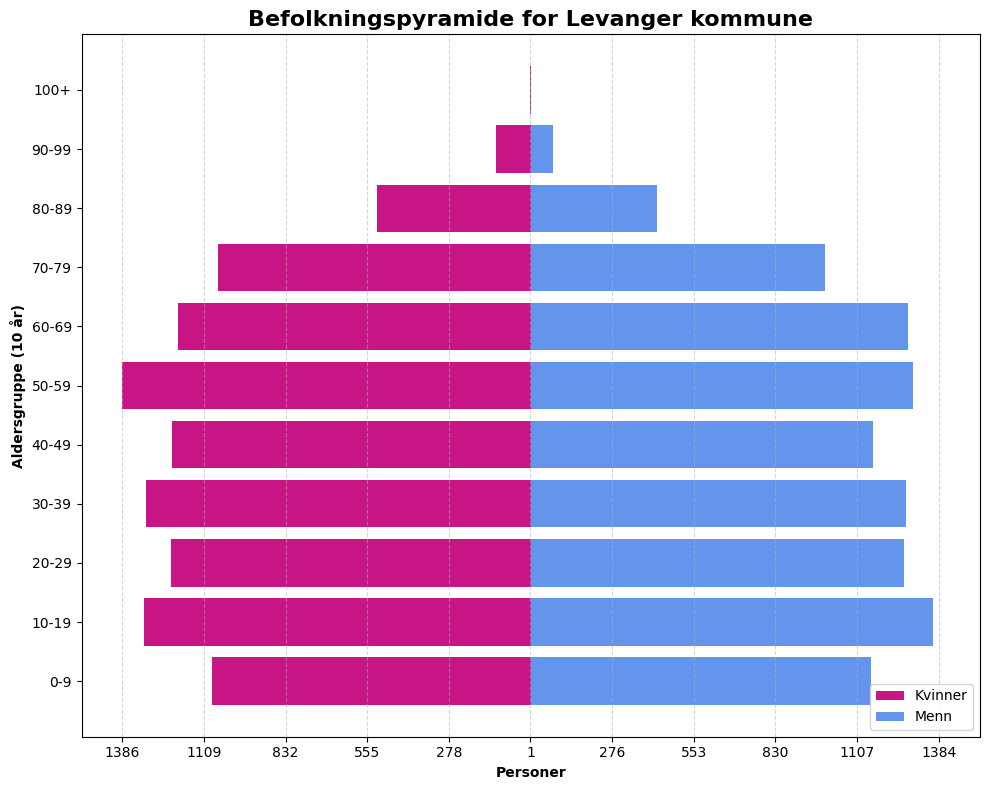

In [4]:

import matplotlib.pyplot as plt
import numpy as np


# gjør om aldersfordelingen
def startalder(tekst):
    # gjør om hele alderskolonnen til string slik at hele kolonnen kan behandles likt
    tekst = str(tekst) 
    if "eller eldre" in tekst:
        return 100
    else:
        # deler teksten i bindestreken
        # velger det første tallet -> startalderen
        # startalderen gjøres om til heltall
        return int(tekst.split("-")[0])

# bruker funksjonen på alderskolonnen
A["Alder"] = A["Alder"].apply(startalder)

# lager 10-års grupperinger
bins = list(range(0, 110, 10)) + [200]
# lager "labels" -> intervallene som vises på y-aksen
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)] + ["100+"]
# legger verdiene i Alderskolonnen inn i bins og gir dem riktig label
# kutter av den siste verdien i right = false
A["aldersgruppe"] = pd.cut(A["Alder"], bins = bins, labels = labels, right = False)

# grupperer og summerer etter alder og kjønn
# tar med tomme rekker
# fjerner eventuelle ugyldige verdier
gruppert = A.groupby("aldersgruppe", observed = False)[["Kvinner", "Menn"]].sum().fillna(0)

# grupperer etter kjønn
# viktig å holde kvinne-kolonnen til negative verdier, slik at kjønnene ikke slås sammen til én linje
kvinner = gruppert["Kvinner"]
menn = gruppert["Menn"]
# gir rekkefølgen plottene settes i 
aldersgrupper = gruppert.index

# plotter figuren
plt.figure(figsize=(10, 8))
plt.barh(aldersgrupper, kvinner, label = "Kvinner", color = "mediumvioletred")
plt.barh(aldersgrupper, menn, label = "Menn", color = "cornflowerblue")

# gjør x-aksen "symmetrisk" for kvinner og menn
# finner den største verdien for hvert kjønn -> gjør kvinnenes tall positive
maks = max(menn.max(), abs(kvinner.min()))
# sørger for at begge sidene av aksen er like lange + lager litt mellomrom
plt.xlim(-maks * 1.1, maks * 1.1)
# lager verdier på x-aksen til en stigning på ca. 20% 
plt.xticks(np.arange(-maks, maks + 1, maks // 5),
           # skriver verdiene positivt tross at kvinnenes verdier er negative
           labels = [str(abs(i)) for i in np.arange(-maks, maks + 1, maks // 5)])

# finpuss
plt.xlabel("Personer", weight = "bold")
plt.ylabel("Aldersgruppe (10 år)", weight = "bold")
plt.title("Befolkningspyramide for Levanger kommune", size = 16, weight = "bold")
plt.legend(loc = "lower right")
plt.grid(axis = 'x', linestyle= '--', alpha = 0.5)
plt.tight_layout()
plt.show()


In [5]:
A
# tabellen ser litt merkelig ut siden jeg har valgt å ikke overskride den gamle tabellen ved å bruke følgende linje:
# A = gruppert.reset_index()

# dette kommer simpelthen av at de senere oppgave kommer til å trenge konkrete tall å feste seg til som de i kolonnen alder, fremfor en string slik som kolonnen aldersgrupper

,Alder,Kvinner,Menn,aldersgruppe
0,0,-486,528,0-9
1,5,-597,626,0-9
2,10,-624,643,10-19
3,15,-688,723,10-19
4,20,-650,647,20-29
5,25,-572,621,20-29
6,30,-672,644,30-39
7,35,-633,631,30-39
8,40,-622,591,40-49
9,45,-594,570,40-49


#### - Finn det totale antall innbyggere i kommunen ut ifra datarammen. Stemmer det over ens med tallene presentert på SSB sine nettsider?

In [6]:
# summerer verdiene fra begge kjønnskolonnene
# gjør kvinnenes verdier positive
total_innbyggere = abs(gruppert["Kvinner"]).sum() + gruppert["Menn"].sum()
print(f"I følge befolkningspyramiden er det totalt {int(total_innbyggere):,} i Levanger kommune")

I følge befolkningspyramiden er det totalt 20,732 i Levanger kommune


___

### 2) 
#### Med utgangspunkt i B:
#### - Lag et pareto-diagram over hvilket land de utvalgte innvandrere presentert i tabellen kommer fra.

In [7]:
B

,Land,2025
0,Sverige,80
1,Litauen,253
2,Polen,177
3,Tyskland,64
4,Ukraina,430
5,Eritrea,112
6,Somalia,50
7,Irak,34
8,Pakistan,3
9,Syria,171


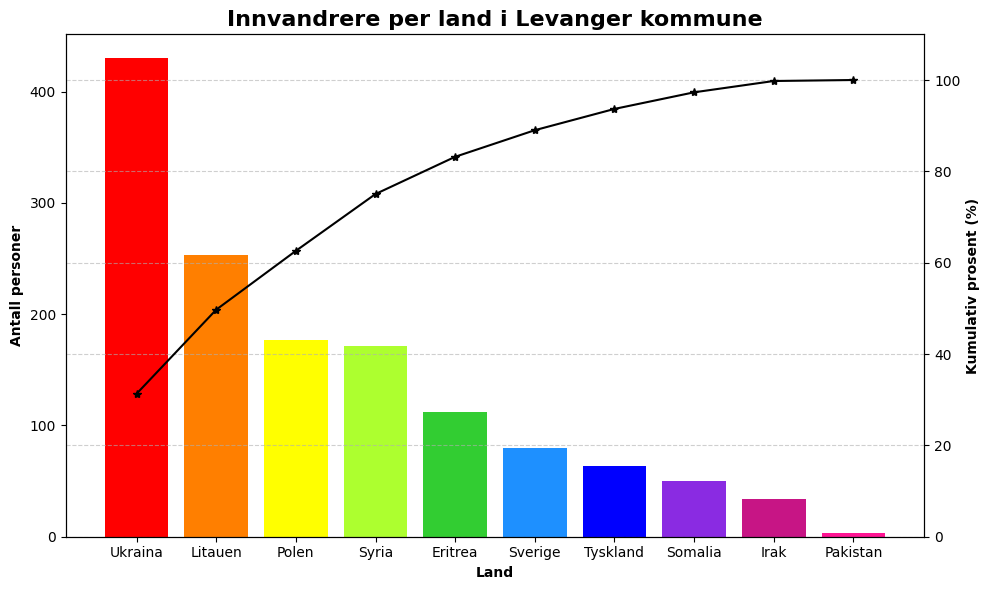

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# sorterer tabellen i avtakende rekkefølge
B = B.sort_values("2025", ascending = False)

# beregner den kumulative prosenten (linjediagram)
# summerer alle verdier for å så dele summen på antall verdier og så gange med 100 for å finne prosentandelen
B["Kumulativ prosent"] = B["2025"].cumsum() / B["2025"].sum() * 100

# lager figuren
fig, ax1 = plt.subplots(figsize = (10, 6))

# lager en enkelt farge for hver nasjon (jeg ville lage fargene selv -> kunne blitt gjort mer effektivt)
# lager en dict med fargene til hvert land
farge_nasjon = {
    "Ukraina": "#FF0000",
    "Litauen": "#FF7F00",
    "Polen": "#FFFF00",
    "Syria": "#ADFF2F",
    "Eritrea": "#32CD32",
    "Sverige": "#1E90FF",
    "Tyskland": "#0000FF",
    "Somalia": "#8A2BE2",
    "Irak": "#C71585",
    "Pakistan": "#FF1493"
}

# lager en liste som lister landene i riktig rekkefølge
farger = [farge_nasjon[Land] for Land in B["Land"]]


# jeg ønsket at hvert land skulle ha hver sin farge som jeg valgte selv. Alternativt kunne jeg ha skrevet denne enkle linjen og gitt alle land samme farge:
#ax1.bar(B["Land"], B["2025"], color = "lightskyblue")

# stolpediagrammet
# lager stolper basert på verdiene fra hvert land
ax1.bar(B["Land"], B["2025"], color = farger)

# setter aksetitler
ax1.set_ylabel("Antall personer", weight = "bold")
ax1.set_xlabel("Land", weight = "bold")
ax1.set_title("Innvandrere per land i Levanger kommune", size = 16, weight = "bold")

# linjediagrammet
# lager en til y-akse for prosenten
ax2 = ax1.twinx()
# setter aksetitler
ax2.plot(B["Land"], B["Kumulativ prosent"], color = "black", marker = "*", linestyle = '-')
ax2.set_ylabel("Kumulativ prosent (%)", weight = "bold")
# setter grenseverdier for y-aksen til høyre
ax2.set_ylim(0, 110)

# finpuss
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()


#### - Finn minimum antall innvandrere i kommunen, og lag et kakediagram der andelen personer med og uten innvandrerbakgrunn framkommer i plottet.

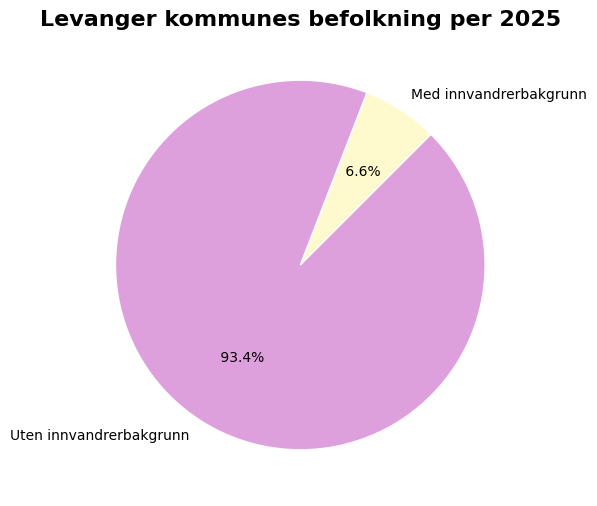

In [9]:
# finner min. antall innvandrere
min_innvandrere = int(B["2025"].sum())

# vi fant totalbefolkningen i oppg. a
total_innbyggere

# finner antall personer uten innvandrerbakgrunn
eksl_innvandring = total_innbyggere - min_innvandrere


# lager kakediagrammet
# setter etiketter
labels = ["Med innvandrerbakgrunn", "Uten innvandrerbakgrunn"]
verdier = [min_innvandrere, eksl_innvandring]
farger = ["lemonchiffon", "plum"]

plt.figure(figsize=(6,6))
plt.pie(verdier, 
        labels = labels,
        # legger inn prosent
        autopct= " %1.1f%%",
        # velger hvor digrammet skal "starte"
        startangle = 45,
        colors = farger,
        # legger hvit linjer mellom de ulike delene for å gjøre figuren mer lesbar
        wedgeprops = dict(edgecolor = "white"))
plt.title("Levanger kommunes befolkning per 2025", weight = "bold", size = 16)
plt.show()


___

### 3) 
#### Med utgangspunkt i C (og litt fra A):
#### - Lag et stolpediagram med to stolper: den ene skal angi antall innbyggere i kommunen i normal arbeidsfør alder (20-65, fra A) og den andre skal angi antallet som jobber i næringene beskrevet i (C). Inkluder også et estimat for prosentandelen som står utenfor jobb i denne kommunen med bakgrunn i disse tallene. Gjør det opp noen tanker om estimatet er godt eller dårlig.

In [10]:
C

,Næring,2020
0,"Jordbruk, skogbruk og fiske",518
1,Sekundærnæringer,2089
2,"Varehandel, hotell og restaurant, samferdsel, ...",2396
3,"Off.adm., forsvar, sosialforsikring",492
4,Undervisning,1077
5,Helse- og sosialtjenester,3005
6,Personlig tjenesteyting,298


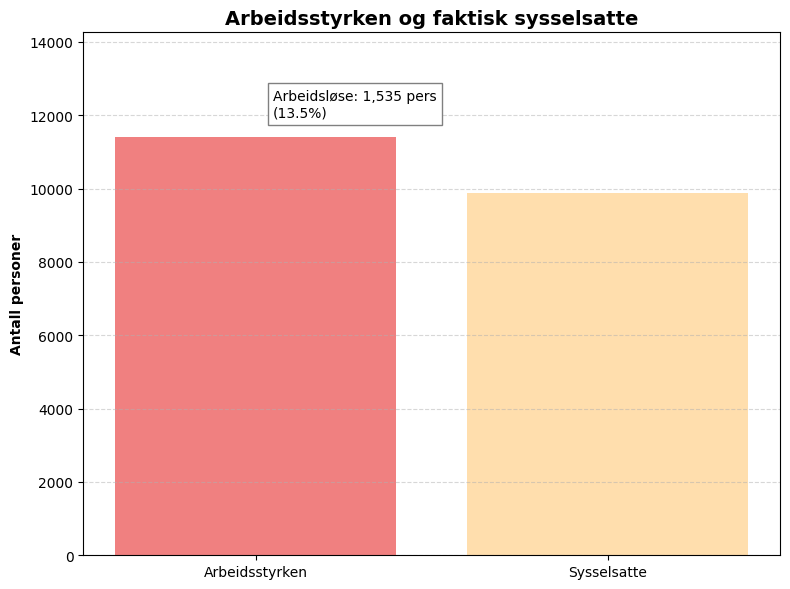

In [11]:
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# finner de arbeidsføre i alderen 20-65
arbeidsføre = A[(A["Alder"] >= 20) & (A["Alder"] <= 64)]

# gjør om kvinnnenes verdier så de blir positive
arbeidsføre["Kvinner"] = arbeidsføre["Kvinner"].abs()

# summerer alle arbeidsføre for både kvinner og menn
arbeidsstyrken = arbeidsføre["Kvinner"].sum() + arbeidsføre["Menn"].sum()

# summerer alle sysselsatte fra alle næringer C
sysselsatte = C["2020"].sum()

# beregner hvor mange som er uten arbeid
arbeidsløse = arbeidsstyrken - sysselsatte

# finner prosenten av arbeidsløse
andel_arbeidsløse = (arbeidsløse / arbeidsstyrken) * 100

# plotter figuren
# setter navn på stolpene
labels = ["Arbeidsstyrken", "Sysselsatte"]
verdier = [arbeidsstyrken, sysselsatte]
farger = ["lightcoral", "navajowhite"]

plt.figure(figsize = (8, 6))
plt.bar(labels, verdier, color = farger)
plt.title("Arbeidsstyrken og faktisk sysselsatte", fontsize = 14, weight = "bold")
plt.ylabel("Antall personer", weight = "bold")
# legger til ekstra høyde slik at legenden ikke faller utenfor
plt.ylim(0, max(verdier)*1.25)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# legger til legende som gir oss total og andel arbeidsløse
tekst = f"Arbeidsløse: {arbeidsløse:,} pers\n({andel_arbeidsløse:.1f}%)"
plt.text(0.05, max(verdier)*1.05, tekst, fontsize = 10,
         bbox = dict(facecolor = 'white', edgecolor = 'gray'))

plt.tight_layout()
plt.show()

Når vi skal estimere f.eks. hvor mange som er arbeidsløse i forhold til hvor mange som er arbeidsføre, er prosentandel (som regel) et bedre estimat en faktisk antall. Dette kommer av at i en kommune som Levanger, der det ikke er en særlig stor befolkning, vil ikke 1,5 tusen arbeidsløse virke som en bekymring fordi det enda er et ganske så lavt tall. 13,5 prosent av arbeidsstyrken er derimot et mer fortellende estimat som gir oss en bedre forståelse for arbeidsmarkedet i dette området. På større mer nasjonale nivå vil derimot faktisk antall være et bedre estimat, ta USA som et eksempel: Per 4. april 2025 er USAs arbeidsledighet på 4,2 prosent. Det høres jo ikke så stort ut, fordi 95,6 prosent er jo i arbeid. Om vi derimot sier at 7,1 millioner mennesker er arbeidsløse, får vi et bedre forståelse ovenfor situasjonen ((Bureau of Labor Statistics, 2025). Konklusjonen blir altså at for et lite sted som Levanger kommune, er prosentandel et bedre estimat enn faktisk total.

#### - Lag et kakediagram der næringene fra C (forenklet sett) er delt inn i «offentlig sektor» (helse og sosialtjenester, undervisning, offentlig administrasjon, forsvar, sosialforsikring) og «privat sektor» (resten). Gjør deg opp noen tanker om denne inndelingen er god eller dårlig.

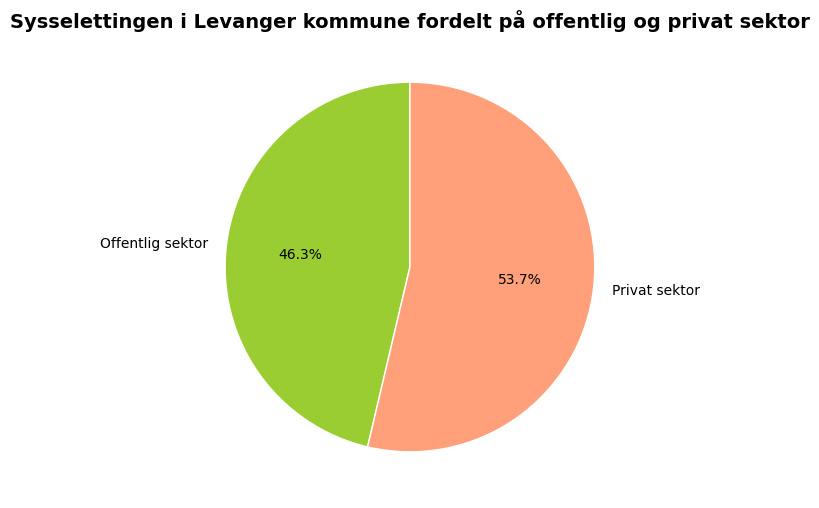

In [12]:
import matplotlib.pyplot as plt

# lager en liste over offentlig sektor
offentlig_næring = [
    "Helse- og sosialtjenester",
    "Undervisning",
    "Off.adm., forsvar, sosialforsikring"
]

# finner næringene innad kolonnen næring og listen offentlig_næring som er av offentlig sektor
offentlig_sektor = C[C["Næring"].isin(offentlig_næring)]["2020"].sum()

# finner privat sektor ved å summere alle næringer minus de offentlige næringene
privat_sektor = C["2020"].sum() - offentlig_sektor

# klargjør dataen til kakediagrammet
labels = ["Offentlig sektor", "Privat sektor"]
verdier = [offentlig_sektor, privat_sektor]
farger = ["yellowgreen", "lightsalmon"]

# lager figuren
plt.figure(figsize = (6, 6))
plt.pie(
    verdier,
    labels = labels,
    autopct = "%1.1f%%",
    colors = farger,
    startangle = 90,
    wedgeprops = dict(edgecolor = "white")
)
plt.title("Sysselettingen i Levanger kommune fordelt på offentlig og privat sektor", fontsize = 14, weight = "bold")
plt.show()


Det er vanskelig å si bare basert på tall om innfordelingen fra figuren er god eller dårlig. Generelt sett vil privat sektor bidra med mer penger til kommunen (i form av mer skatt), som er positivt ettersom dette kan styrke det offentlige tilbudet innad kommunen. Om det derimot er store behov for folk i offentlig sektor, kan overvekten i privat sektor slå negativt ut for kommunen. Noe vi ikke ser i figuren er hvor involverte sektorene er med hverandre: Private selskaper kan utføre arbeid innen offentlig sektor, og mange arbeidere som jobber i en mellomsituasjon mellom privat og offentlig sektor, kan havne på "feil" side av kaka.

___

### 4) 
#### Med utgangspunkt i D:
#### - Gjenskap kakediagrammet fra nettsidene på SSB.


In [13]:
D

,Utdanningsnivå,Personer 16 år og over
0,Grunnskolenivå,3513
1,Videregående skolenivå,6505
2,"Universitets- og høgskolenivå, kort",4686
3,"Universitets- og høgskolenivå, lang",1498
4,Uoppgitt eller ingen fullført utdanning,60


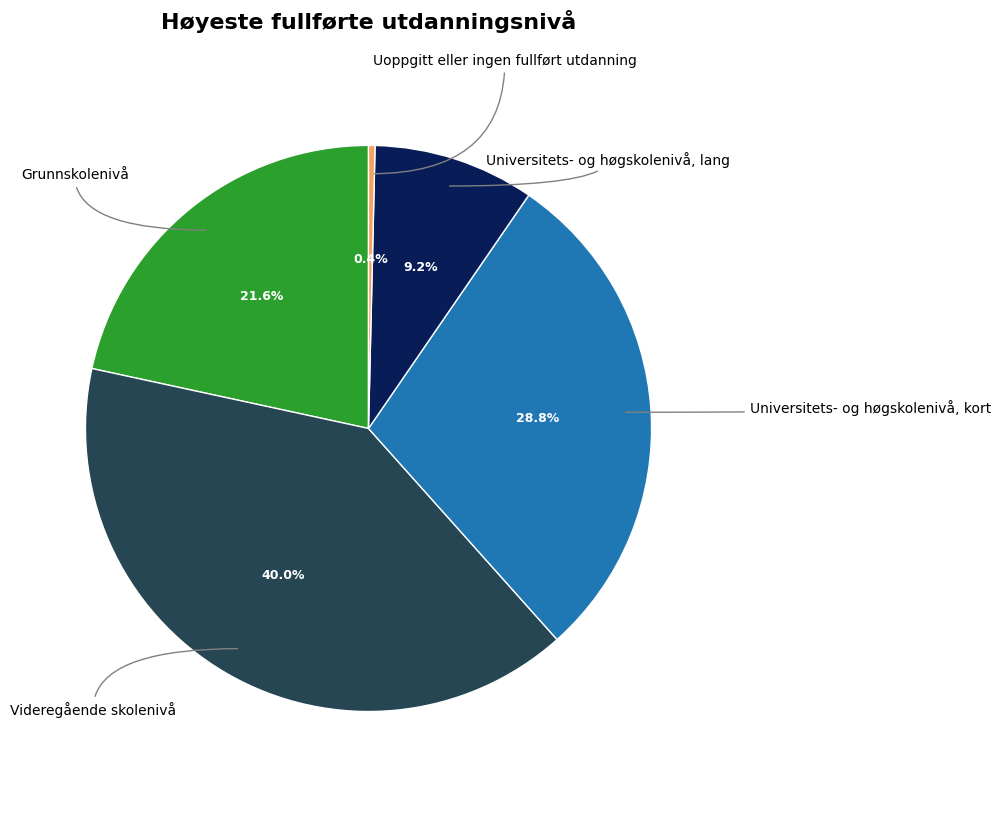

In [14]:

# gir hver kakebit en egen farge (kan skippes)
farge_utdanning = {
    "Grunnskolenivå": "#2ca02c",
    "Videregående skolenivå": "#264653",
    "Universitets- og høgskolenivå, kort": "#1f77b4",
    "Universitets- og høgskolenivå, lang": "#081d58",
    "Uoppgitt eller ingen fullført utdanning": "#f4a261"
}

# setter etiketter og tilsvarende verdier
labels = D["Utdanningsnivå"]
verdier = D["Personer 16 år og over"]
farger = [farge_utdanning[label] for label in labels]

# lager figuren
fig, ax = plt.subplots(figsize = (10, 9))
# bruker ax.pie fordi noen av etikettene måtte settes manuelt (gir mer kontroll)
wedges, texts, autotexts = ax.pie(
    verdier,
    colors = farger,
    startangle = 90,
    wedgeprops=dict(edgecolor='white'),
    autopct = '%1.1f%%',
    # setter etikettene for best mulig lesbarhet
    textprops=dict(color = "white", size = 9, weight = "bold")
)

# legger labels (etiketter) utenfor figuren
for i, wedge in enumerate(wedges):
    # henter midtvinkelen i hvert kakestykke
    # theta2 er sluttvinkel, theta1 er startvinkel
    ang = (wedge.theta2 + wedge.theta1) / 2.0 
    # basert på midtvinkelen, radiusen til kaken og y-aksen til figuren, blir etiketten plassert en passende avstand fra kakestykket
    radius = 1.35
    y_offset = 1.15

    # de to øverste etikettene falt inn i hverandre, så vi plasserer dem manuelt ved å endre målet på y-aksen de pålasseres etter
    if labels[i] == "Uoppgitt eller ingen fullført utdanning":
        y_offset = 1.3
    elif labels[i] == "Universitets- og høgskolenivå, lang":
        y_offset = 1.0

    # bruker trigonometri for å plassere etikettene best mulig
    # bruker cos til å finne x-posisjonen rundt sirkelen
    x = np.cos(np.deg2rad(ang)) * radius
    # bruker sin for å finne y-posisjonen rundt sirkelen
    y = np.sin(np.deg2rad(ang)) * y_offset
    # basert på x sin verdi (om den er før eller etter 0 på en usynlig x-akse) blir etiketten plassert til høyre eller venstre for kakestykket
    ha = "left" if x > 0 else "right"

    # lager piler ut til etikettene
    ax.annotate(
        # selve tiketten
        labels[i],
        # velger hvor pilen skal starte på kakestykket (basertb på x og y posisjon)
        # ganger med 0.9 for å sette pilen helt ytterst på kakestykket, fremfor midt i
        xy=(np.cos(np.deg2rad(ang)) * 0.9, np.sin(np.deg2rad(ang)) * 0.9),
        # velger hvor teksten skal stå basert på xy
        xytext=(x, y),
        # teksten plasseres etter pilens plassering (høyre eller venstre)
        # va bestemmer hvordan tekster vertikalt justeres etter pilen, slik at den ikke faller inn i pilen
        ha = ha, va = 'center',
        fontsize = 10,
        # stilen på pilen
        arrowprops= dict(arrowstyle = '-', connectionstyle = 'angle3', color = 'gray')
    )

# dytter diagrammet lenger ned i figuren slik at etikettene ikke forstyrrer tittelen
plt.subplots_adjust(top = 0.95)
ax.set_title("Høyeste fullførte utdanningsnivå", fontsize = 16, weight = "bold")
# plasserer kaken i midten av figuren -> hindrer aksene i å sette seg automatisk
ax.axis("equal")


plt.tight_layout()
plt.show()

#### - Presenter dataen fra kakediagrammet ved et stolpediagram.

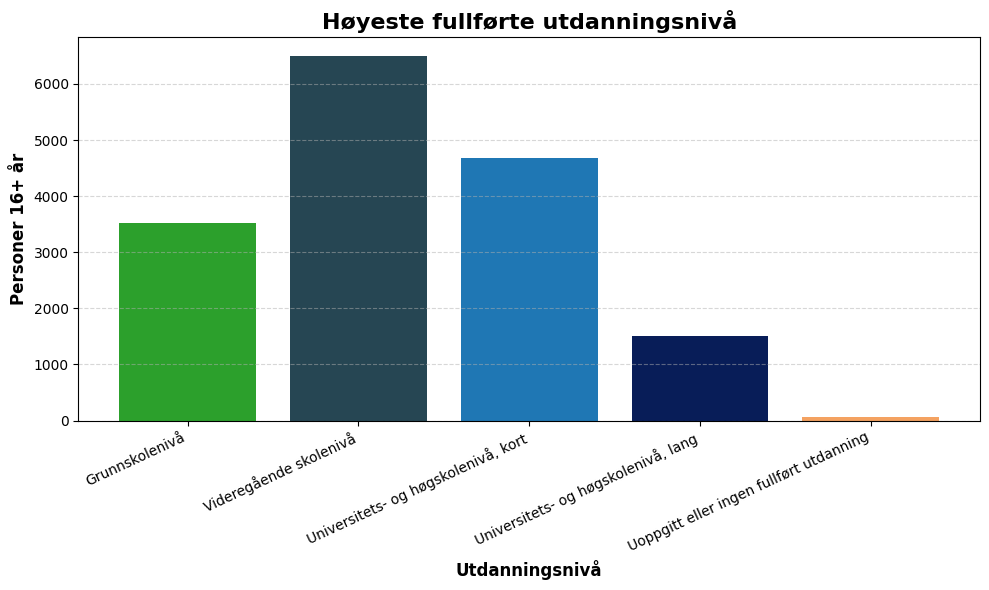

In [15]:

# henter etikettene for stolpene og tilsvarende verdier
labels = D["Utdanningsnivå"]
verdier = D["Personer 16 år og over"]

# kopierer fargene fra forrige plot
farge_utdanning = {
    "Grunnskolenivå": "#2ca02c",
    "Videregående skolenivå": "#264653",
    "Universitets- og høgskolenivå, kort": "#1f77b4",
    "Universitets- og høgskolenivå, lang": "#081d58",
    "Uoppgitt eller ingen fullført utdanning": "#f4a261"
}
farger = [farge_utdanning[label] for label in labels]

# lager stolpediagrammet
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, verdier, color = farger)

#finpuss
plt.title("Høyeste fullførte utdanningsnivå", fontsize = 16, weight = "bold")
plt.xlabel("Utdanningsnivå", fontsize = 12, weight = "bold")
plt.ylabel("Personer 16+ år", fontsize = 12, weight = "bold")
# roterer etikettene slik at de ikke faller over hverandre
plt.xticks(rotation = 25, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()


#### - Med utgangspunkt i disse diagrammene og kakediagrammene fra (3) og (2): argumenter når man bør og ikke bør bruke kakediagram.

Slik som i videoen (vedlegg fra oppgaven) sa: Kakediagram er nesten bare en effektiv og god representasjon av data når den har få kategorier. Slik som i oppgave 3.2 der diagrammet bare presenterer to sektorer, privat og offentlig. Hvis en sku brukt stolpediagram her måtte en ha forvrengt aksene i større  grad for å framlegge tydelige forskjeller, mens med et kakediagram kommer forskjellene frem av seg selv. SSB sin figur gir derimot et sløvt og nesten misvisende resultat, ettersom det blir vanskeligere å se den faktiske prosenten hver kategori utfyller. Selv valgte jegf å legge inn prosenten i diagrammet, for å gjøre det mer lesbart; Det gjorde ikke SSB og si blir sittende igjen som spørsmålstegn

___

### 5) 
#### Med utgangspunkt i E:
#### - Avgjør omtrentlig størrelsen på kulturbudsjettet til kommunen.

In [16]:
E

,Tjenesteområde,2024
0,Aktivitetstilbud barn og unge,146
1,Bibliotek,313
2,Muséer,35
3,Idrett og tilskudd til andres idrettsanlegg,46
4,Kommunale idrettsbygg og idrettsanlegg,739
5,Kulturskoler,295
6,Kommunale kulturbygg,214


In [17]:
# summerer alle verdiene fra hvert tjenesteområde
kulturbudsjett = E["2024"].sum()


# finner totalt kulturbudsjett
totalt_kulturbudsjett = total_innbyggere * kulturbudsjett

print(f"Totalt i 2024 hadde Levanger kommune et kulturbudsjett på {kulturbudsjett} kroner per innbygger, og dermed {totalt_kulturbudsjett} totalt")



Totalt i 2024 hadde Levanger kommune et kulturbudsjett på 1788 kroner per innbygger, og dermed 37068816 totalt


#### - Avgjør hvor stor andel av kulturbudsjettet som går til å drifte kommunale idrettsbygg og anlegg.

In [18]:

# finner verdien for kommunale idrettsbygg og anlegg
idrettsbygg = E[E["Tjenesteområde"] == "Kommunale idrettsbygg og idrettsanlegg"]["2024"].values[0]

# regner ut andelen i prosent
andel_kulturbudsjett = (idrettsbygg / kulturbudsjett) * 100

print(f"I 2024 brukte Levanger kommune {andel_kulturbudsjett:.1f}% av det samlede kulturbudsjettet på kommunale idrettsbygg og anlegg")


I 2024 brukte Levanger kommune 41.3% av det samlede kulturbudsjettet på kommunale idrettsbygg og anlegg


___

### 6) 
#### Med utgangspunkt i F:
#### - Avgjør hvor stor prosentandel av kommunens utgifter som ikke er inkludert i datagrunnlaget.

In [19]:
F

,Tjenesteområde,2024
0,Sosialsektoren samlet,4.9
1,Barnevern,3.5
2,"Vann, avløp, renovasjon, avfall (VAR)",7.8
3,"Administrasjon, kommune",4.8
4,"Kultursektoren, kommune",3.4
5,Barnehage,11.2
6,Grunnskole,17.5
7,Helse- og omsorg,33.4


In [20]:
# summerer alle de oppgitte utgiftsprosentene
utgiftsprosent = F["2024"].sum()

# finner prosenten som ikke ble inkludert
ikke_inkludert = 100 - utgiftsprosent

print(f"{ikke_inkludert:.1f}% ble ikke inkludert i kommunens utgifter i 2024")

13.5% ble ikke inkludert i kommunens utgifter i 2024


___

### 7) 
#### Med utgangspunkt i G og A:
#### - Bestem omtrentlig andelen hybridbiler som kjører rundt i kommunen.


In [21]:
G

,Drivstoff,2024
0,Bensin,2555
1,Diesel,5832
2,El.,2208
3,Annet drivstoff,1196


In [22]:

# finner totalt antall kjøretøy
totale_biler = G["2024"].sum()

# ifølge SSBs egen side, går hybridbiler under kategorien "Annet drivstoff"
# henter ut verdien fra raden annet drivstoff fra kolonnen 2024
hybridbiler = G[G["Drivstoff"] == "Annet drivstoff"]["2024"].values[0]

# 3. Regn ut prosentandel
andel_hybrider = (hybridbiler / totale_biler) * 100

# 4. Print resultatet
print(f"I Levanger kommune ligger andelen hybridbiler på {andel_hybrider:.1f}%")


I Levanger kommune ligger andelen hybridbiler på 10.1%


#### - Bestem antall biler per person i «kjørbar alder» (ca. 20-80) for din kommune.

In [23]:
# finner kjørbar alder
kjørbar = A[(A["Alder"] >= 20) & (A["Alder"] <= 80)]

# gjør om kvinnnenes verdier så de blir positive
kjørbar["Kvinner"] = kjørbar["Kvinner"].abs()

# summerer alle kjørbare for både kvinner og menn
kjørbare_total = kjørbar["Kvinner"].sum() + kjørbar["Menn"].sum()

# finner antall biler per person i kjørbar alder
biler_per_kjørbar = totale_biler / kjørbare_total

print(f"For hver kjørbar person i Levanger kommune, er det {biler_per_kjørbar:.1f} biler")

For hver kjørbar person i Levanger kommune, er det 0.8 biler


___

### 8) 
#### Skriv en funksjon som har designet angitt under.
#### Input: en tabell med to kolonner der den ene er kategorier og den andre tall i tilhørende kategori.
#### Utput: et stolpediagram som illustrerer tabellen.
#### - Test funksjonen på ett av datasettene tilhørende oppgaven.
#### - Argumenter hvorfor funksjonen ikke trenger et «return statenment».

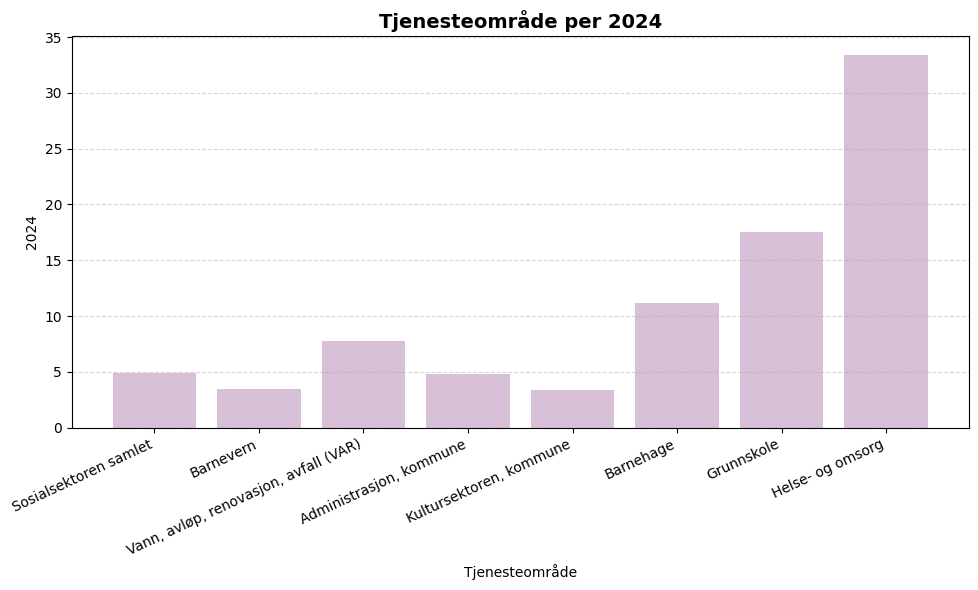

In [24]:
import matplotlib.pyplot as plt

def plott_stolper(tabell):
    # henter kolonnenavnene som er første raden i tabellen
    kategori_navn = tabell.columns[0]
    verdi_navn = tabell.columns[1]

    # henter verdiene fra hver kolonne
    kategorier = tabell[kategori_navn]
    verdier = tabell[verdi_navn]

    # lager plottet
    plt.figure(figsize=(10, 6))
    bars = plt.bar(kategorier, verdier, color = "thistle")

    # henter tittel og aksetitler direkte fra tabellen
    plt.title(f"{kategori_navn} per {verdi_navn}", fontsize = 14, weight = "bold")
    plt.xlabel(kategori_navn)
    plt.ylabel(verdi_navn)
    # roterer teksten på x-aksen fordi mange tabeller har lange kategorinavn
    plt.xticks(rotation = 25, ha = 'right')
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
    plt.tight_layout()
    plt.show()

# bruker tabell F som eksempel
plott_stolper(F)


Denne funksjonen trenger ikke en "return", fordi plt.show() allerede returnerer figuren. Funksjoner brukes som oftest (i min erfaring) til beregninger, ikke visualiseringer. Ved beregninger må vi returnere et resultat, men i visuelle tilfeller som denne, er det mer naturlig å bruke matplotlib sin innebygde funksjon, fremfor et "return statement".

___

### 9) 
#### På mest mulig informativt/illustrerende vis og etter eget forgodtbefinnende, bruk {A, C, D} (for din kommune) og {TJ, TU, TA} (for Tromsø) til å
#### - sammenligne utdanningsnivået i din tildelte kommune og Tromsø.

In [25]:
D

,Utdanningsnivå,Personer 16 år og over
0,Grunnskolenivå,3513
1,Videregående skolenivå,6505
2,"Universitets- og høgskolenivå, kort",4686
3,"Universitets- og høgskolenivå, lang",1498
4,Uoppgitt eller ingen fullført utdanning,60


In [26]:
TU

,Utdanningsnivå,Personer 16 år og over
0,Grunnskolenivå,13373
1,Videregående skolenivå,19923
2,"Universitets- og høgskolenivå, kort",17859
3,"Universitets- og høgskolenivå, lang",12003
4,Uoppgitt eller ingen fullført utdanning,199


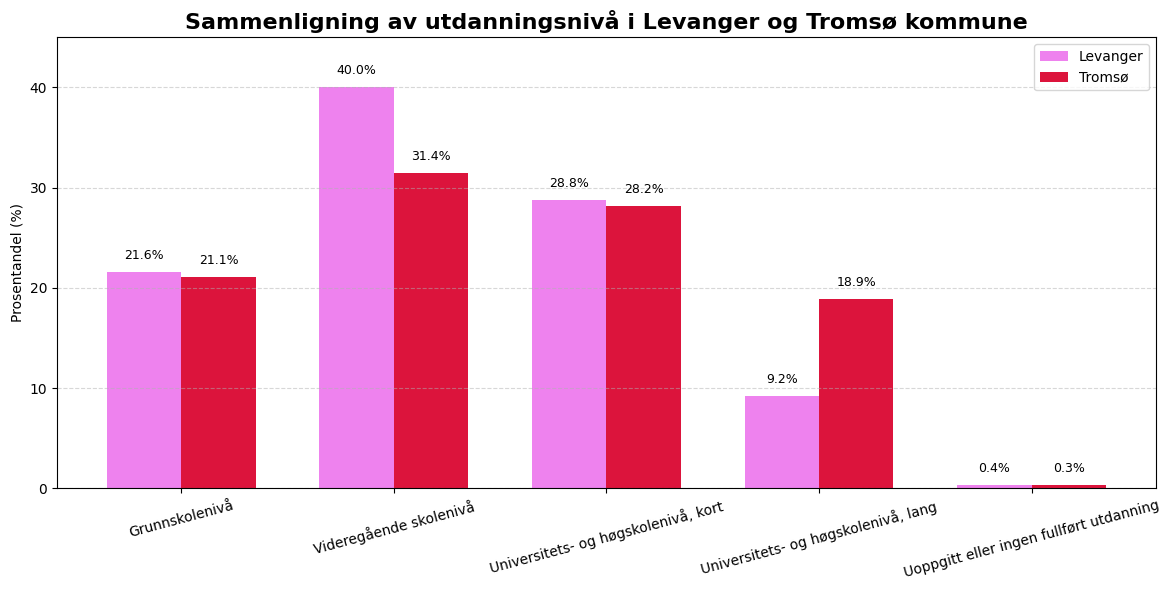

In [27]:


# henter data fra datasettene 
# henter utdanningsnivåene
kategorier = D["Utdanningsnivå"]
# verdier fra levanger
levanger_verdier = D["Personer 16 år og over"]
# verdier fra tromsø
tromso_verdier = TU["Personer 16 år og over"]

# regner ut prosentandelen for hvert utdanningsnivå
levanger_prosent = (levanger_verdier / levanger_verdier.sum()) * 100
tromso_prosent = (tromso_verdier / tromso_verdier.sum()) * 100

# lager x-posisjoner for hver kategori, slik at stolpene står ved siden av hverandre
x = np.arange(len(kategorier))
# setter et mål for bredden av hver stolpe
bredde = 0.35

# lager barplottet
fig, ax = plt.subplots(figsize = (12, 6))
# dytter L-stolpene til venstre for å gjøre plass til T
bar1 = ax.bar(x - bredde/2, levanger_prosent, width = bredde, label = "Levanger", color = "violet")
# dytter T-stolpene litt til høyre for å gjør plass til L
bar2 = ax.bar(x + bredde/2, tromso_prosent, width = bredde, label = "Tromsø", color = "crimson")

# lager tekst på toppen av hver stolpe for å forbedre lesbarheten
# lager en løkke for begge kategoriene
for bars in [bar1, bar2]:
    for bar in bars:
        # henter høyden -> y-verdien
        høyde = bar.get_height()
        # legger til tekst over stolpen ved å finne x-posisjonen
        # deler x-posisjonen på bredden for å sette teksten i midten av stolpen
        # legger til litt høyde for å forbedre lesbarheten
        ax.text(bar.get_x() + bar.get_width()/2, høyde + 1,
                # plasserer teksten i punktet vi definerte over stolpene
                f"{høyde:.1f}%", ha = 'center', va = 'bottom', fontsize = 9)

# utvider y-aksen ved å finne maksverdi, slik at teksten ikke treffer "taket"  
maks_prosent = max(levanger_prosent.max(), tromso_prosent.max())
ax.set_ylim(0, maks_prosent + 5)

ax.set_title("Sammenligning av utdanningsnivå i Levanger og Tromsø kommune", fontsize = 16, weight = "bold")
ax.set_xticks(x)
ax.set_xticklabels(kategorier, rotation=15)
ax.set_ylabel("Prosentandel (%)")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Jeg valgte å bruke den prosentvise andelen fremfor de faktiske tallene fra tabellene. Dette kommer simpelthen av at det er flere innbyggere i Tromsø enn i Levanger, så å bruke folketall gi Tromsø en misvisende fordel. Prosentandelen gir derimot et bedre bilde på utdanningsnivåene i kommunen satt opp mot hverandre, med hensyn til innbyggertall.

#### - sammenlign omtrentlig «offentlig» mot «privat» sektor (se oppgave (3)) for din tildelte kommune og Tromsø.

In [28]:
C

,Næring,2020
0,"Jordbruk, skogbruk og fiske",518
1,Sekundærnæringer,2089
2,"Varehandel, hotell og restaurant, samferdsel, ...",2396
3,"Off.adm., forsvar, sosialforsikring",492
4,Undervisning,1077
5,Helse- og sosialtjenester,3005
6,Personlig tjenesteyting,298


In [29]:
TJ

,Næring,2020
0,"Jordbruk, skogbruk og fiske",670
1,Sekundærnæringer,5205
2,"Varehandel, hotell og restaurant, samferdsel, ...",15018
3,"Off.adm., forsvar, sosialforsikring",2729
4,Undervisning,5362
5,Helse- og sosialtjenester,11178
6,Personlig tjenesteyting,1691


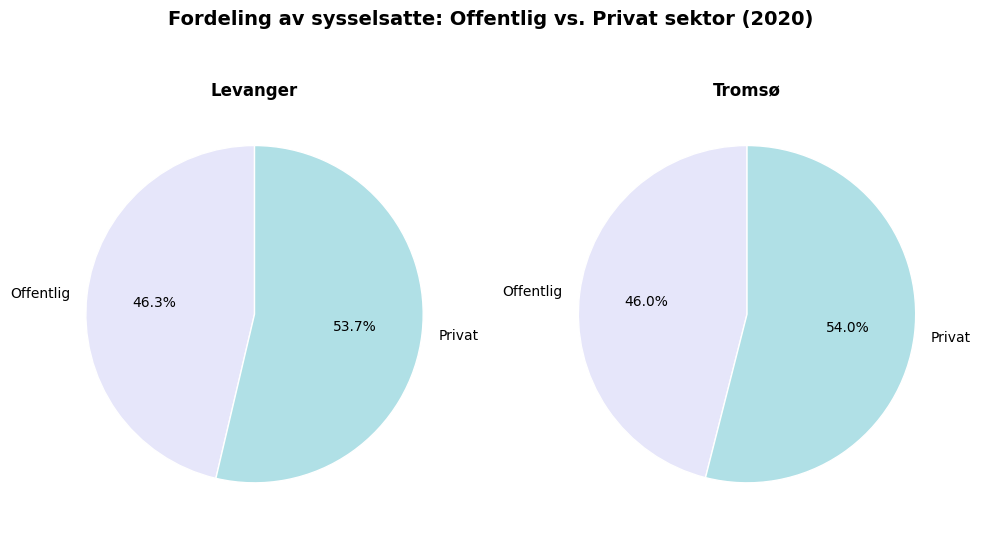

In [30]:

# lager en liste med næringene innen offentlig sektor
offentlig = [
    "Off.adm., forsvar, sosialforsikring",
    "Undervisning",
    "Helse- og sosialtjenester"
]

# bruker lambda til å hente ut hver enkelt næring, for å så sjekke om den er i offentlig-lista eller om den er i privat
C["Sektor"] = C["Næring"].apply(lambda x: "Offentlig" if x in offentlig else "Privat")
TJ["Sektor"] = TJ["Næring"].apply(lambda x: "Offentlig" if x in offentlig else "Privat")

# grupperer etter sektor, for å så summere alle verdiene
levanger_sum = C.groupby("Sektor")["2020"].sum()
tromso_sum = TJ.groupby("Sektor")["2020"].sum()

# finner prosentandelen
levanger_prosent = (levanger_sum / levanger_sum.sum()) * 100
tromso_prosent = (tromso_sum / tromso_sum.sum()) * 100

# setter etiketter og farger
labels = ["Offentlig", "Privat"]
farger = ["lavender", "powderblue"]

# lager kakediagrammet
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# finpusser levanger-kaken
axs[0].pie(levanger_prosent, labels = labels, autopct = '%1.1f%%',
           startangle = 90, colors = farger, wedgeprops = dict(edgecolor='white'))
axs[0].set_title("Levanger", weight = "bold")

# finpusser tromsø-kaken
axs[1].pie(tromso_prosent, labels = labels, autopct = '%1.1f%%',
           startangle = 90, colors = farger, wedgeprops = dict(edgecolor='white'))
axs[1].set_title("Tromsø", weight = "bold")

# Hovedtittel og layout
fig.suptitle("Fordeling av sysselsatte: Offentlig vs. Privat sektor (2020)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### - sammenlign omtrentlig arbeidsstokken i jobb for din tildelte kommune og Tromsø (se oppgave (1) og (3)).

In [31]:
TA

,Alder,Kvinner,Menn
0,0-4 år,-1899,1997
1,5-9 år,-1936,1981
2,10-14 år,-2042,2223
3,15-19 år,-2218,2487
4,20-24 år,-2759,2671
5,25-29 år,-3474,3536
6,30-34 år,-3289,3591
7,35-39 år,-2843,2915
8,40-44 år,-2576,2726
9,45-49 år,-2433,2445


In [32]:
# bruker samme kode som i oppg. 1 og 3 for å finne arbeidsstokken i Tromsø

# gjør om aldersfordelingen


# bruker funksjonen på alderskolonnen
TA["Alder"] = TA["Alder"].apply(startalder)

# lager 10-års grupperinger
bins = list(range(0, 110, 10)) + [200]
# lager "labels" -> intervallene som vises på y-aksen
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)] + ["100+"]
# legger verdiene i Alderskolonnen inn i bins og gir dem riktig label
# kutter av den siste verdien i right = false
TA["aldersgruppe"] = pd.cut(TA["Alder"], bins = bins, labels = labels, right = False)

# grupperer og summerer etter alder og kjønn
# tar med tomme rekker
# fjerner eventuelle ugyldige verdier
gruppert_tromsø = TA.groupby("aldersgruppe", observed = False)[["Kvinner", "Menn"]].sum().fillna(0)

# grupperer etter kjønn
# viktig å holde kvinne-kolonnen til negative verdier, slik at kjønnene ikke slås sammen til én linje
kvinner = gruppert_tromsø["Kvinner"]
menn = gruppert_tromsø["Menn"]
# gir rekkefølgen plottene settes i 
aldersgrupper = gruppert_tromsø.index

arbeidsføre_tromsø = TA[(TA["Alder"] >= 20) & (TA["Alder"] <= 64)]

# gjør om kvinnnenes verdier så de blir positive
arbeidsføre_tromsø["Kvinner"] = arbeidsføre_tromsø["Kvinner"].abs()

# summerer alle arbeidsføre for både kvinner og menn
arbeidsstyrken_tromsø = arbeidsføre_tromsø["Kvinner"].sum() + arbeidsføre_tromsø["Menn"].sum()

sysselsatte_tromsø = TJ["2020"].sum()

andel_levanger = (sysselsatte / arbeidsstyrken) * 100
andel_tromsø = ( sysselsatte_tromsø / arbeidsstyrken_tromsø) * 100

# nå som vi har arbeidsstyrken og sysselsatte for både Levanger og Tromsø, kan vi plotte dem sammen



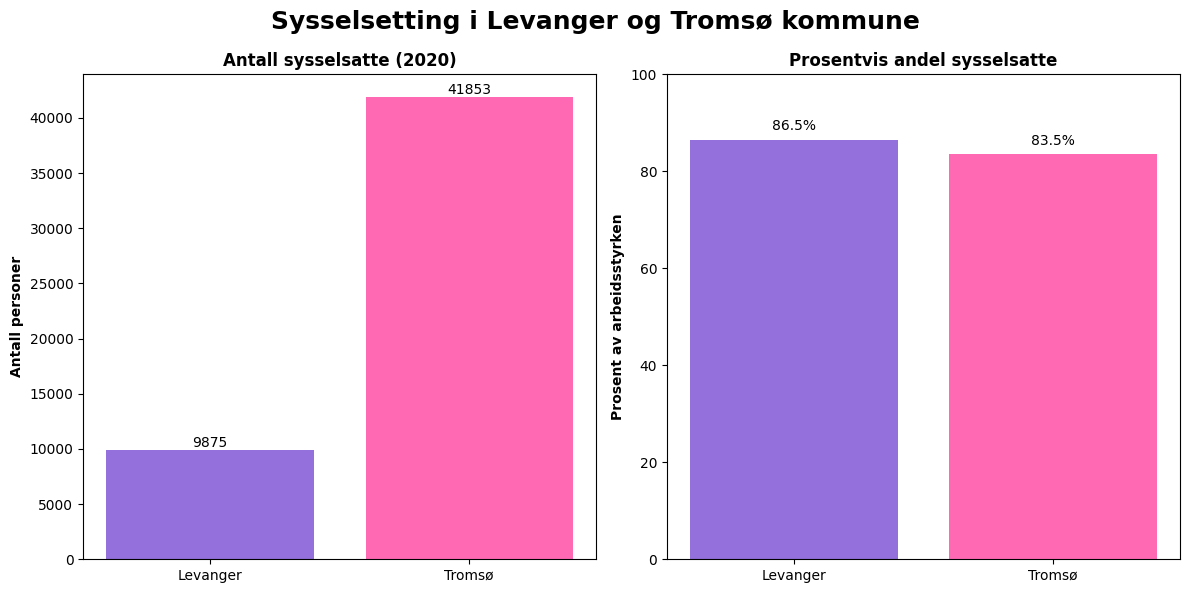

In [33]:

# lager de ulike stolpene
kommuner = ["Levanger", "Tromsø"]

# den totale sysselsettingen
syssel_data = [sysselsatte, sysselsatte_tromsø]
# den prosentvise sysselsettingen
andel_data = [andel_levanger, andel_tromsø]

# lager to subplot
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

# figur 1 -> totalt antall sysselsatte
axs[0].bar(kommuner, syssel_data, color= ["mediumpurple", "hotpink"])
axs[0].set_title("Antall sysselsatte (2020)", weight="bold")
axs[0].set_ylabel("Antall personer", weight = "bold")
# legger inn tall over stolpene
for i, v in enumerate(syssel_data):
    # levanger = 0, tromsø = 1
    # plusser på 300 for å få teksten litt høyere opp på y-aksen
    # gjør teksten om til både tekst og heltall, og plasserer den i midten ift. stolpen
    axs[0].text(i, v + 300, f"{int(v)}", ha = 'center', fontsize = 10)


# figur 2 -> prosentandel sysselsatte
axs[1].bar(kommuner, andel_data, color=["mediumpurple", "hotpink"])
axs[1].set_title("Prosentvis andel sysselsatte", weight = "bold")
axs[1].set_ylabel("Prosent av arbeidsstyrken", weight = "bold")
# setter y-aksen til p gå opptil 100%
axs[1].set_ylim(0, 100)
for i, v in enumerate(andel_data):
    axs[1].text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

fig.suptitle("Sysselsetting i Levanger og Tromsø kommune", fontsize=18, weight = "bold")
plt.tight_layout()
plt.show()

Disse figurene representerer hvor viktig det er å ta henysn til partenes størrelse ved sammenligning av mengder. Tromsø har over fire ganger så mange sysselsatte som Levanger, men tross dette har Levanger en større prosentandel av arbeidsstyrken i jobb.

___

### Ekstra kilder:

Bureau of Labor Statistics. (2025, april 4). The employment situation — March 2025. https://www.bls.gov/news.release/pdf/empsit.pdf